In [2]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#connects plotly to pandas

import cufflinks as cf
#make plotly work in your Notewook

from plotly.offline import download_plotlyjs,init_notebook_mode
, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
from statsmodels.tsa.stattools import grangercausalitytests

In [4]:
def plot_health_data(ax,csv,country,col,mult):
    cal_df=pd.read_csv(csv)
    indexer=cal_df[cal_df['location']==country].index

    country_df=cal_df.loc[indexer,'date':col]
    country_df=country_df.dropna()
    country_df.set_index('date',inplace=True)
    country_df.drop(country_df.columns.difference([col]),
                    1,inplace=True)
    country_df[col]=country_df[col]*mult
    ax=country_df.plot(ax=ax)


In [5]:
data1='https://raw.githubusercontent.com/derekbanas/TimeSeriesAnalysis/main/US-Daily-Calories.csv'

In [6]:
df_calories=pd.read_csv(data1)

In [7]:
df_calories.head(5)

,date,location,calories
0,1975-01-01,United States,3033
1,1976-01-01,United States,3163
2,1977-01-01,United States,3135
3,1978-01-01,United States,3155
4,1979-01-01,United States,3214


In [8]:
data2='https://raw.githubusercontent.com/derekbanas/TimeSeriesAnalysis/main/US-Obese.csv'
df_obese=pd.read_csv(data2)

In [9]:
df_obese.head(5)

,date,location,obese
0,1975-01-01,United States,10.7
1,1976-01-01,United States,11.0
2,1977-01-01,United States,11.3
3,1978-01-01,United States,11.7
4,1979-01-01,United States,12.0


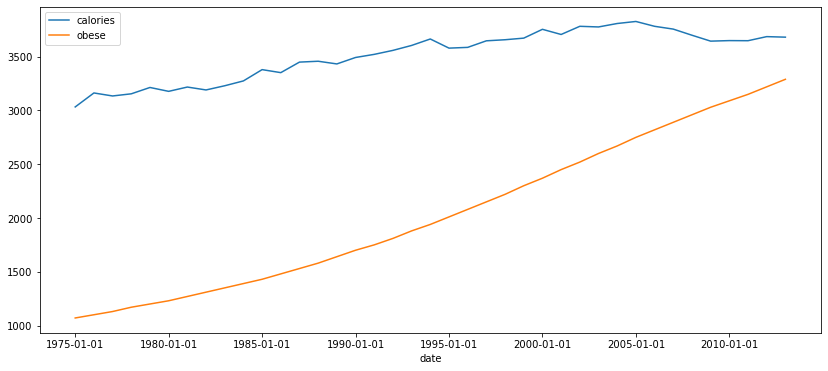

In [10]:
fig,ax=plt.subplots(figsize=(14,6))
plot_health_data(ax,data1,'United States','calories',1)
plot_health_data(ax,data2,'United States','obese',100)

In [11]:
cal_df=pd.concat([df_calories,df_obese.obese],axis=1)
cal_df

,date,location,calories,obese
0,1975-01-01,United States,3033,10.7
1,1976-01-01,United States,3163,11.0
2,1977-01-01,United States,3135,11.3
3,1978-01-01,United States,3155,11.7
4,1979-01-01,United States,3214,12.0
5,1980-01-01,United States,3178,12.3
6,1981-01-01,United States,3218,12.7
7,1982-01-01,United States,3191,13.1
8,1983-01-01,United States,3230,13.5
9,1984-01-01,United States,3275,13.9


In [32]:
obese_diff=np.diff(cal_df['obese'],n=1,axis=-1)
cal_diff=np.diff(cal_df['calories'],n=1,axis=-1)
cal_df=pd.concat([cal_df,pd.Series(obese_diff).rename('ObeseDiff')],axis=1)
cal_df=pd.concat([cal_df,pd.Series(cal_diff).rename('CalDiff')],axis=1)
cal_df=cal_df.dropna()
cal_df

,date,location,calories,obese,ObeseDiff,CalDiff
0,1975-01-01,United States,3033,10.7,0.3,130.0
1,1976-01-01,United States,3163,11.0,0.3,-28.0
2,1977-01-01,United States,3135,11.3,0.4,20.0
3,1978-01-01,United States,3155,11.7,0.3,59.0
4,1979-01-01,United States,3214,12.0,0.3,-36.0
5,1980-01-01,United States,3178,12.3,0.4,40.0
6,1981-01-01,United States,3218,12.7,0.4,-27.0
7,1982-01-01,United States,3191,13.1,0.4,39.0
8,1983-01-01,United States,3230,13.5,0.4,45.0
9,1984-01-01,United States,3275,13.9,0.4,105.0


In [33]:
grangercausalitytests(cal_df[['ObeseDiff','CalDiff']],maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4824  , p=0.4921  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=0.5249  , p=0.4687  , df=1
likelihood ratio test: chi2=0.5212  , p=0.4703  , df=1
parameter F test:         F=0.4824  , p=0.4921  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5387  , p=0.0953  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=5.8964  , p=0.0524  , df=2
likelihood ratio test: chi2=5.4605  , p=0.0652  , df=2
parameter F test:         F=2.5387  , p=0.0953  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1821  , p=0.0392  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=11.9329 , p=0.0076  , df=3
likelihood ratio test: chi2=10.2680 , p=0.0164  , df=3
parameter F test:         F=3.1821  , p=0.0392  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9832  , p=0.0043  , df_d

{1: ({'ssr_ftest': (0.48237029259285813, 0.49206965338173714, 34.0, 1),
   'ssr_chi2test': (0.5249323772334045, 0.4687452204257836, 1),
   'lrtest': (0.5212435236474846, 0.4703117117448017, 1),
   'params_ftest': (0.4823702925842194, 0.4920696533855867, 34.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5387421611472747, 0.09526742606059525, 31.0, 2),
   'ssr_chi2test': (5.896433406535606, 0.05243312644849304, 2),
   'lrtest': (5.460543478315458, 0.06520156944103427, 2),
   'params_ftest': (2.5387421611461614, 0.09526742606068644, 31.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.1820986334538524, 0.03921153941085653, 28.0, 3),
   'ssr_chi2test': (11.932869875451946, 0.00761669359057782, 3),
   'lrtest': (10.267957654669715, 0.016420488807945922, 3),
   'params_ftest': (3.1820986334532773, 0.03921153941087961, 28.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [34]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs